In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [10]:
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
X = df[california.feature_names].values
Y = df['MedHouseVal'].values

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [15]:
Y_pred = model.predict(X_test)

In [16]:
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(Y_test, Y_pred)
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.5558915986952422
R^2 Score: 0.5757877060324524


In [21]:
# Cross-validation
cross_val_mse = cross_val_score(model, X, Y, cv=10, scoring='neg_mean_squared_error')
cross_val_mse = -cross_val_mse  # Convert negative MSE to positive
mean_cross_val_mse = np.mean(cross_val_mse)
print(f'Mean Cross-Validation MSE: {mean_cross_val_mse}')

Mean Cross-Validation MSE: 0.550952429695663


In [22]:
# Calculate residuals
residuals = Y_test - Y_pred

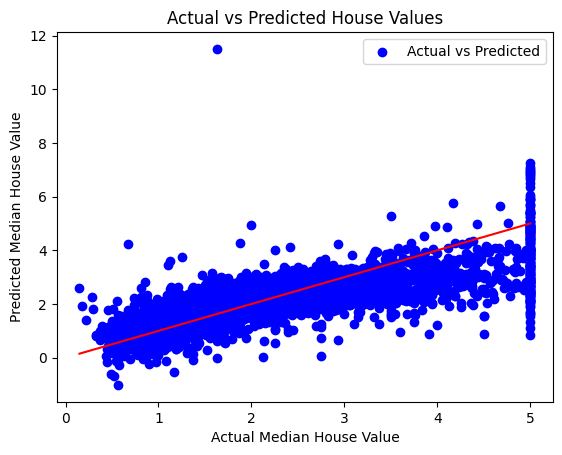

In [23]:
plt.scatter(Y_test, Y_pred, color='blue', label='Actual vs Predicted')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted House Values')
plt.legend()
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red')  # Diagonal line
plt.show()

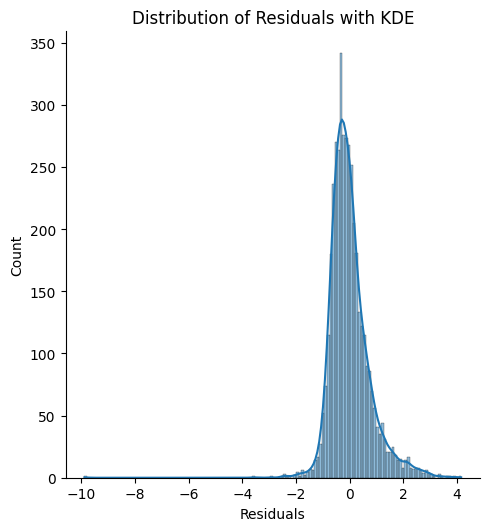

In [24]:
sns.displot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals with KDE')
plt.show()